## 1) importing modules and data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


import os 
from scipy.sparse import  coo_matrix


### step 1: data loading and preprocesing

In [2]:
train_data= pd.read_csv("marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv", sep='\t')
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [3]:
train_data.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [6]:
train_data["Product Tags"].head()

0    OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1    Nice 'n Easy Permanent Color, 111 Natural Medi...
2    Clairol Nice 'N Easy Permanent Color 7/106A Na...
3    Kokie Professional Matte Lipstick, Hot Berry, ...
4    Gillette TRAC II Plus Razor Blade Refills, Fit...
Name: Product Tags, dtype: object

In [7]:
train_data.shape

(5000, 32)

In [8]:
train_data.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


#### extracting important colums

In [9]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head()

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,NaN,NaN,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,NaN,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [11]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

#### --Handling the nan values

In [13]:
train_data["Product Rating"].fillna(0, inplace=True)
train_data["Product Reviews Count"].fillna(0, inplace=True)
train_data["Product Category"].fillna("",inplace=True)
train_data["Product Brand"].fillna("", inplace=True)
train_data["Product Description"].fillna("", inplace=True)


/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_58690/619528969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Product Rating"].fillna(0, inplace=True)
/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_58690/619528969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Product Rating"].fillna(0,

In [14]:
train_data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [17]:
# checking the dublicate data
print(f"the number of dublicate data is {train_data.duplicated().sum()}")

the number of dublicate data is 0


In [18]:
#renaming the column
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}

train_data.rename(columns=column_name_mapping, inplace=True)

/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_58690/459752758.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns=column_name_mapping, inplace=True)


In [20]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [22]:
train_data["ID"] = train_data["ID"].str.extract(r'(\d+)').astype(float)
train_data["ProdID"] = train_data["ProdID"].str.extract(r'(\d+)').astype(float)

/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_58690/2746595591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["ID"] = train_data["ID"].str.extract(r'(\d+)').astype(float)
/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_58690/2746595591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["ProdID"] = train_data["ProdID"].str.extract(r'(\d+)').astype(float)


In [37]:
train_data.head(10)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.000000e+00,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,7.600000e+01,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.000000e+00,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.000000e+00,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.000000e+00,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
5,2.620000e+02,7.569141e+09,4.6,52.0,Beauty > Hair Care > Hair Care Brands > Old Sp...,Old Spice,Old Spice Artisan Styling High Hold Matte Fini...,https://i5.walmartimages.com/asr/73214b95-72ce...,Old Spice Artisan Molding Clay is a Mens Styli...,Old Spice Artisan Styling High Hold Matte Fini...
6,5.224642e+09,3.710000e+02,4.3,10.0,Personal Care > Oral Care > Kids Oral Care,Colgate,"Colgate My First Baby and Toddler Toothpaste, ...",https://i5.walmartimages.com/asr/d28b16f4-1bd4...,Colgate My First Baby and Toddler Toothpaste i...,"Colgate My First Baby and Toddler Toothpaste, ..."
7,6.000000e+00,0.000000e+00,0.0,0.0,Beauty > Makeup > Nails,BMC,BMC Bright and Loud Cream Gel Lacquer Polish S...,https://i5.walmartimages.com/asr/93f8bbf3-2dfd...,"Lights, Sick Beats, and Epic Gel Polish! We pr...",BMC Bright and Loud Cream Gel Lacquer Polish S...
8,5.070000e+02,1.007940e+42,5.0,1.0,Beauty > Hair Care > Hair Care Brands > Suave,Suave,Suave Extra Hold 7 Shaping Mousse 9 oz (Pack o...,https://i5.walmartimages.com/asr/05f5ba16-335d...,Free Shipping Pack of 6 Pack of 6 for the UPC:...,Suave Extra Hold 7 Shaping Mousse 9 oz (Pack o...
9,3.200000e+01,1.030521e+42,0.0,950.0,Health > Lip Care > Vaseline,Vaseline,(3 pack) Vaseline Lip Therapy Tinted Lip Balm ...,https://i5.walmartimages.com/asr/6fced36e-5459...,Vaseline Lip Therapy Lip Balm Mini Rosy is cli...,(3 pack) Vaseline Lip Therapy Tinted Lip Balm ...


#### EDA

In [25]:
num_user = train_data["ID"].nunique()
num_iters = train_data["ProdID"].nunique()
num_rating = train_data["Rating"].nunique()
print(f"the number of unique id : {num_user}")
print(f"the number of unique user is : {num_user}")
print(f"the number of unique rating : {num_rating}")


the number of unique id : 1721
the number of unique user is : 1721
the number of unique rating : 36


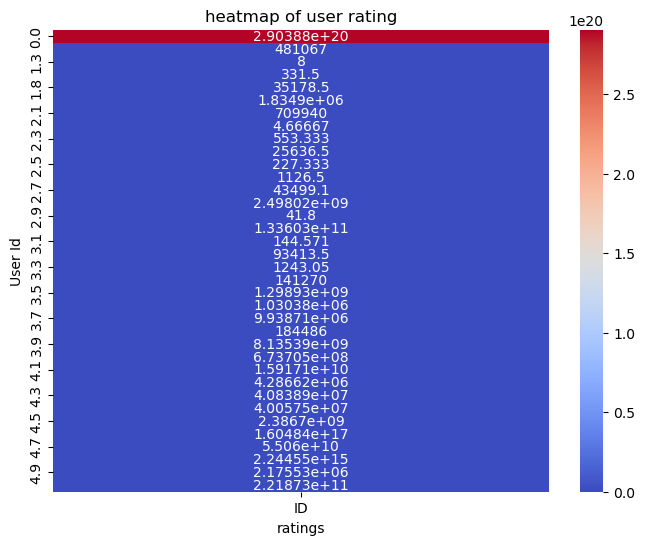

In [32]:
# pivote the dataframe
heatmap  = train_data.pivot_table("ID","Rating")


#creating the headmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title("heatmap of user rating")
plt.xlabel("ratings")
plt.ylabel("User Id")
plt.show()

In [33]:
heatmap

,ID
Rating,
0.0,2.903881e+20
1.0,4.810669e+05
1.3,8.000000e+00
1.5,3.315000e+02
1.8,3.517850e+04
2.0,1.834903e+06
2.1,7.099400e+05
2.2,4.666667e+00
2.3,5.533333e+02


In [36]:
train_data["ID"].value_counts()

ID
7.0        224
2.0        218
6.0        214
8.0        206
0.0        204
          ... 
6452.0       1
57685.0      1
3419.0       1
708.0        1
2771.0       1
Name: count, Length: 1721, dtype: int64

In [38]:
train_data["ProdID"].value_counts()

ProdID
3.0          214
9.0          204
1.0          200
5.0          199
0.0          196
            ... 
31305.0        1
1897.0         1
484.0          1
8111776.0      1
208.0          1
Name: count, Length: 1697, dtype: int64

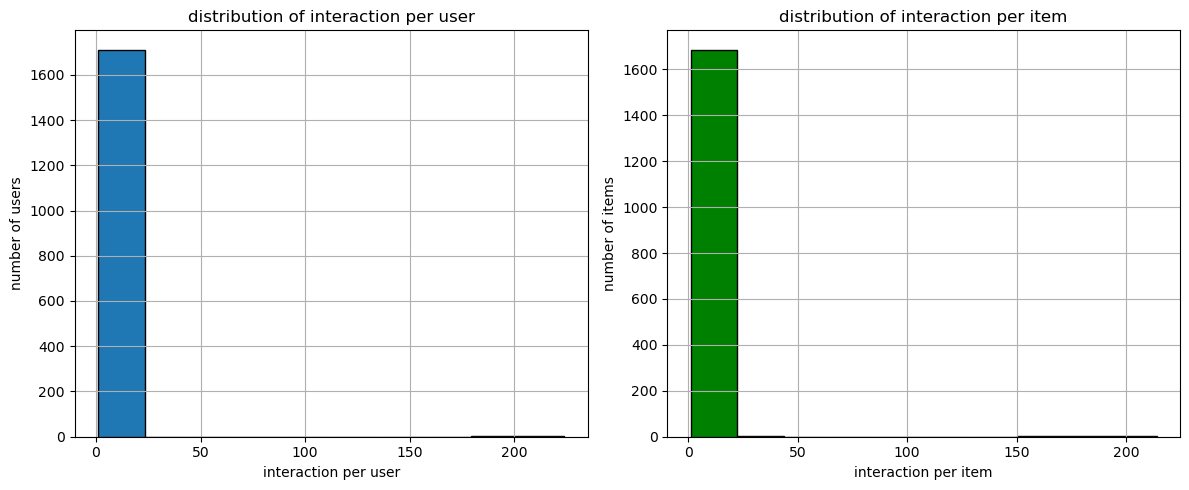

In [34]:
# distribution of interaction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data["ID"].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel("interaction per user")
plt.ylabel("number of users")
plt.title("distribution of interaction per user")

plt.subplot(1, 2, 2)
train_data["ProdID"].value_counts().hist(bins=10, edgecolor='k', color="green")
plt.xlabel("interaction per item")
plt.ylabel("number of items")
plt.title("distribution of interaction per item")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'top 5 Most Popular Items')

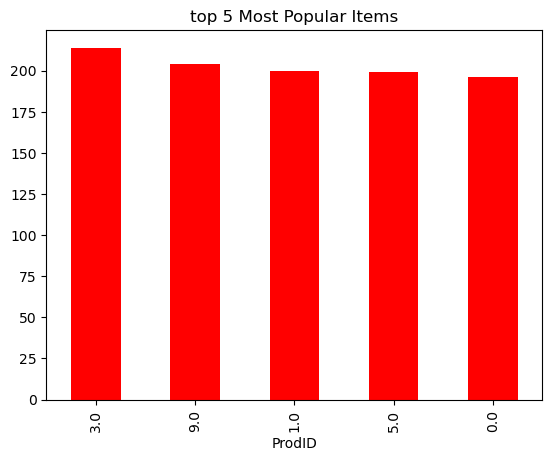

In [43]:
# top 5 most popular items
popular_items = train_data["ProdID"].value_counts().head(5)
popular_items.plot(kind="bar", color="red")
plt.title("top 5 Most Popular Items")


Text(0.5, 1.0, 'top 5 most rated product')

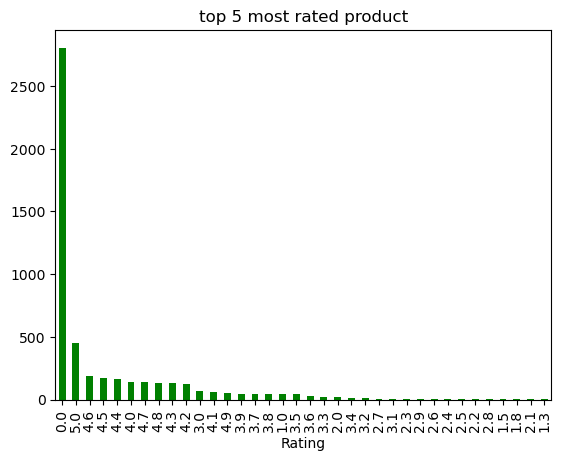

In [47]:
# most rated products
most_rated_products = train_data["Rating"].value_counts()
most_rated_products.plot(kind="bar",color="green")
plt.title("top 5 most rated product")

#### data clearning and tag creation

In [51]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

In [55]:
def clean_and_extract(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)


colums_to_extract_tags_from = ["Category", "Brand", "Description"]

for column in colums_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract)

In [56]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...",Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [57]:
# saving the data for further user
train_data.to_csv("preporcess_data_1.csv")

In [3]:
train_data= pd.read_csv("preporcess_data_1.csv")
train_data.head()

,Unnamed: 0,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...",Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,3,4.000000e+00,3.0,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","Kokie Professional Matte Lipstick, Hot Berry, ..."
4,4,9.900000e+02,3.0,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


## Rating  based Recomedation model

In [12]:
#by doing the below we group the data based on the mean rating of the product
average_rating = train_data.groupby(["Name","ReviewCount","Brand","ImageURL"])["Rating"].mean().reset_index()

In [13]:
average_rating

,Name,ReviewCount,Brand,ImageURL,Rating
0,$6 Mail-In Rebate Available Braun Epilator Sil...,146.0,braun,https://i5.walmartimages.com/asr/c7d78838-e8e2...,4.5
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1.0,"peter, thomas, roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5.0
2,($11 Value) Love Beauty and Planet Coconut Wat...,278.0,"love, beauty, planet",https://i5.walmartimages.com/asr/0348d82d-2a13...,0.0
3,($125 Value) Impressions Vanity Touch Pro LED ...,2.0,"impressions, vanity",https://i5.walmartimages.com/asr/b886b154-97fd...,2.5
4,($129 Value) CHI G2 Ceramic Titanium Infused H...,23.0,chi,https://i5.walmartimages.com/asr/9bcc0ed7-d62c...,4.4
...,...,...,...,...,...
4866,"wet n wild Photo Focus Correcting Palette, Col...",12.0,"wet, n, wild",https://i5.walmartimages.com/asr/750275fb-ccfa...,3.3
4867,"wet n wild Photo Focus Liquid Foundation, Medi...",7827.0,"wet, n, wild",https://i5.walmartimages.com/asr/c2c5dc7e-9bbb...,0.0
4868,"wet n wild Photo Focus Pressed Powder, Dark Café",635.0,"wet, n, wild",https://i5.walmartimages.com/asr/57bd497f-0d5c...,4.2
4869,"wet n wild Silk Finish Lipstick, Honolulu Is C...",4259.0,"wet, n, wild",https://i5.walmartimages.com/asr/0e25f705-a924...,3.9


In [15]:
#sorting the above data based on rating
top_rated_items = average_rating.sort_values(by="Rating", ascending=False)

In [18]:
#getting the top 10 products
top_rated_items.head(10)   

,Name,ReviewCount,Brand,ImageURL,Rating
4275,Summers Eve Feminine Deodorant Spray Island Sp...,3.0,"summer, eve",https://i5.walmartimages.com/asr/49694d47-bfaa...,5.0
4622,"Vitamin E Beauty 14,000 IU Skin Oil 1 oz",3.0,jason,https://i5.walmartimages.com/asr/5db537a7-7117...,5.0
4627,"W8Less Plus Spray, Gel, Firm Hold By Rusk, 5.3 Oz",1.0,rusk,https://i5.walmartimages.com/asr/8a8f22e9-d560...,5.0
458,"Ahava Natural Dead Sea Mud Gift Box, 13.6 Oz",1.0,ahava,https://i5.walmartimages.com/asr/cf65dfb4-5e5f...,5.0
3697,"Pureology Hydrating Conditioner, 33.8 Oz",13.0,pureology,https://i5.walmartimages.com/asr/909554f4-cc0a...,5.0
460,Air Freshener Febreze,2.0,febreze,https://i5.walmartimages.com/asr/61f581e6-c5dd...,5.0
4624,Volu Volume Enhancing Softening Shampoo,1.0,davines,https://i5.walmartimages.com/asr/e667c965-1f6a...,5.0
1387,Daily Conditioner Conditionneur Quotidien 11.8...,1.0,reuzel,https://i5.walmartimages.com/asr/6ff7f6aa-35d6...,5.0
469,"Air Wick Freshmatic Refill Automatic Spray, Pa...",2.0,"air, wick",https://i5.walmartimages.com/asr/c75274f5-3ad9...,5.0
3696,"Pureology Curl Complete Uplifting Curl, 6.8 Oz",3.0,pureology,https://i5.walmartimages.com/asr/59e21d68-53db...,5.0


In [19]:
rating_based_recomendation = top_rated_items.head(10)

In [21]:
rating_based_recomendation["Rating"] = rating_based_recomendation["Rating"].astype(int)
rating_based_recomendation["ReviewCount"] = rating_based_recomendation["ReviewCount"].astype(int)

/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_61051/2153032461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendation["Rating"] = rating_based_recomendation["Rating"].astype(int)
/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_61051/2153032461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendation["ReviewCount"] = rating_based_recomendation["ReviewCount"].astype(int)


In [22]:
rating_based_recomendation

,Name,ReviewCount,Brand,ImageURL,Rating
4275,Summers Eve Feminine Deodorant Spray Island Sp...,3,"summer, eve",https://i5.walmartimages.com/asr/49694d47-bfaa...,5
4622,"Vitamin E Beauty 14,000 IU Skin Oil 1 oz",3,jason,https://i5.walmartimages.com/asr/5db537a7-7117...,5
4627,"W8Less Plus Spray, Gel, Firm Hold By Rusk, 5.3 Oz",1,rusk,https://i5.walmartimages.com/asr/8a8f22e9-d560...,5
458,"Ahava Natural Dead Sea Mud Gift Box, 13.6 Oz",1,ahava,https://i5.walmartimages.com/asr/cf65dfb4-5e5f...,5
3697,"Pureology Hydrating Conditioner, 33.8 Oz",13,pureology,https://i5.walmartimages.com/asr/909554f4-cc0a...,5
460,Air Freshener Febreze,2,febreze,https://i5.walmartimages.com/asr/61f581e6-c5dd...,5
4624,Volu Volume Enhancing Softening Shampoo,1,davines,https://i5.walmartimages.com/asr/e667c965-1f6a...,5
1387,Daily Conditioner Conditionneur Quotidien 11.8...,1,reuzel,https://i5.walmartimages.com/asr/6ff7f6aa-35d6...,5
469,"Air Wick Freshmatic Refill Automatic Spray, Pa...",2,"air, wick",https://i5.walmartimages.com/asr/c75274f5-3ad9...,5
3696,"Pureology Curl Complete Uplifting Curl, 6.8 Oz",3,pureology,https://i5.walmartimages.com/asr/59e21d68-53db...,5


In [ ]:
print("Rating Based Recomender System : ")
rating_based_recomendation[["Name", "Rating","ReviewCount","Brand","ImageURL"]] = rating_based_recomendation[["Name", "Rating","ReviewCount","Brand","ImageURL"]]